In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv('C:/Users/hp/Desktop/healthcare-dataset-stroke-data/train_2v.csv')
df1= pd.read_csv('C:/Users/hp/Desktop/healthcare-dataset-stroke-data/test_2v.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,Male,20.0,0,0,No,Private,Rural,74.43,18.4,formerly smoked
18597,362,Male,61.0,0,0,Yes,Govt_job,Rural,211.55,31.6,smokes
18598,29839,Female,79.0,0,0,Yes,Private,Rural,125.74,29.4,never smoked
18599,6438,Male,55.0,0,0,Yes,Govt_job,Rural,69.46,33.8,never smoked


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.isnull().sum()/len(df)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [18]:
df1.isnull().sum()/len(df1)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [14]:
df_tot = pd.concat([df,df1])

C:\Users\hp\.jupyter\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
df_tot.shape

(62001, 12)

In [19]:
df_tot.isnull().sum()/len(df_tot)*100

Residence_type        0.000000
age                   0.000000
avg_glucose_level     0.000000
bmi                   3.311237
ever_married          0.000000
gender                0.000000
heart_disease         0.000000
hypertension          0.000000
id                    0.000000
smoking_status       30.714021
stroke               30.001129
work_type             0.000000
dtype: float64

In [23]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [21]:
df_tot.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,0.0,Never_worked


In [31]:
df_obj =df.select_dtypes(include=['object'])
df_int = df.select_dtypes(exclude=['object'])
df_obj.smoking_status = df_obj.smoking_status.astype('str')

C:\Users\hp\.jupyter\New folder\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_obj = df_obj.apply(le.fit_transform)

In [49]:
total = pd.concat([df_obj,df_int],axis=1)

In [50]:
total.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,4,0,1,30669,3.0,0,0,95.12,18.0,0
1,1,1,2,1,2,30468,58.0,1,0,87.96,39.2,0
2,0,0,2,1,1,16523,8.0,0,0,110.89,17.6,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
4,1,0,1,0,1,46136,14.0,0,0,161.28,19.1,0


In [51]:
total = total.drop(['id'],axis=1)

In [52]:
total1 = total.drop(['smoking_status'],axis=1)

In [53]:
total.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,4,0,1,3.0,0,0,95.12,18.0,0
1,1,1,2,1,2,58.0,1,0,87.96,39.2,0
2,0,0,2,1,1,8.0,0,0,110.89,17.6,0
3,0,1,2,0,0,70.0,0,0,69.04,35.9,0
4,1,0,1,0,1,14.0,0,0,161.28,19.1,0


In [54]:
total['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [79]:
total.corr('pearson')

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,1.000000,-0.031351,0.063739,0.001508,-0.049289,-0.027903,0.023709,0.082061,0.035465,-0.021570,0.011198
ever_married,-0.031351,1.000000,-0.359848,0.004422,0.063340,0.693070,0.176575,0.128833,0.153607,0.337517,0.071920
work_type,0.063739,-0.359848,1.000000,-0.003473,-0.140156,-0.366664,-0.060800,-0.021835,-0.059303,-0.318601,-0.010800
Residence_type,0.001508,0.004422,-0.003473,1.000000,0.008318,0.001299,-0.003124,-0.002743,0.000014,-0.003685,0.002247
smoking_status,-0.049289,0.063340,-0.140156,0.008318,1.000000,0.020976,0.012275,-0.025063,-0.004135,0.065951,-0.011367
age,-0.027903,0.693070,-0.366664,0.001299,0.020976,1.000000,0.272169,0.250188,0.237627,0.352236,0.156049
hypertension,0.023709,0.176575,-0.060800,-0.003124,0.012275,0.272169,1.000000,0.119777,0.160211,0.153779,0.075332
heart_disease,0.082061,0.128833,-0.021835,-0.002743,-0.025063,0.250188,0.119777,1.000000,0.146938,0.054133,0.113763
avg_glucose_level,0.035465,0.153607,-0.059303,0.000014,-0.004135,0.237627,0.160211,0.146938,1.000000,0.184199,0.078917
bmi,-0.021570,0.337517,-0.318601,-0.003685,0.065951,0.352236,0.153779,0.054133,0.184199,1.000000,0.018407


In [45]:
from imblearn.over_sampling import  RandomOverSampler
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [61]:
X_resampled, y_resampled = ros.fit_resample(total1.loc[:,total1.columns!='stroke'], total1['stroke'])

In [62]:
total1.loc[:,total1.columns!='stroke'].columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type', 'age',
       'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [63]:
X_resampled_1, y_resampled_1 = ros.fit_resample(total1.loc[:,total1.columns!='stroke'], 
                                            total1['stroke'])

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled_1, y_resampled_1, test_size=0.2, random_state=0)

In [71]:
from sklearn.tree import DecisionTreeClassifier 
Dt = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train) 
predictions = Dt.predict(x_test) 

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions,digits=3) 

In [73]:
print(cmat)

[[6251 2174]
 [1447 7175]]


In [74]:
print(reports)

              precision    recall  f1-score   support

           0      0.812     0.742     0.775      8425
           1      0.767     0.832     0.799      8622

    accuracy                          0.788     17047
   macro avg      0.790     0.787     0.787     17047
weighted avg      0.789     0.788     0.787     17047



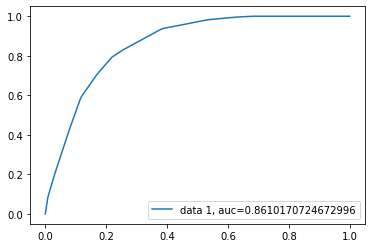

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score
y_pred_proba = Dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [86]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions,digits=3) 

In [88]:
print(reports)

              precision    recall  f1-score   support

           0      0.812     0.742     0.775      8425
           1      0.767     0.832     0.799      8622

    accuracy                          0.788     17047
   macro avg      0.790     0.787     0.787     17047
weighted avg      0.789     0.788     0.787     17047



In [84]:
cmat

array([[6251, 2174],
       [1447, 7175]], dtype=int64)